## Objective


1. Ad Hoc Analysis: Conducts custom analysis based on credit reporting companies. 

2. The data analysis includes:
    - exploratory analysis
    - Models used to predict the time taken to solve a consumer issue. (“what if” modeling)
    - Word cloud (different credit reporting companies).



3. The following has been followed as a part of the process
    - EDA, handling NaN vals and why is it so important?
    - EDA on the number of complaints
    - Overview of different Categories and current complaints
    - Textual analysis + Random forest classifier for classifying the number of days required to solve an issue

4. I have also used pandas_profiling library to get an overlook of the data that is available. You can choose to skip that step by commenting it out before running the notebook.

In [1]:
# helps in printing all the interactive outputs of a variable

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import all required packages

import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import pylab,datetime
import matplotlib.pyplot as plt
import simplejson as json


# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# for iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import sys
# !{sys.executable} -m pip install sklearn --user

In [4]:
#Import csv files
df = pd.read_csv("complaints.csv")
# df_hr = pd.read_csv("hour.csv")



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531946 entries, 0 to 1531945
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1531946 non-null  object
 1   Product                       1531946 non-null  object
 2   Sub-product                   1296781 non-null  object
 3   Issue                         1531946 non-null  object
 4   Sub-issue                     976089 non-null   object
 5   Consumer complaint narrative  511545 non-null   object
 6   Company public response       578399 non-null   object
 7   Company                       1531946 non-null  object
 8   State                         1181019 non-null  object
 9   ZIP code                      1155570 non-null  object
 10  Tags                          206706 non-null   object
 11  Consumer consent provided?    921280 non-null   object
 12  Submitted via                 1531946 non-

In [6]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2012-01-30,Credit card,NaN,Payoff process,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,FL,33634,NaN,NaN,Web,2012-01-31,Closed with relief,Yes,No,18663
1,2013-08-07,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"FIRST HAWAIIAN, INC.",HI,96816,NaN,NaN,Web,2013-08-07,Closed with explanation,Yes,No,482822
2,2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,2011-12-11,Closed with relief,Yes,No,2329
3,2013-05-16,Credit card,NaN,Billing disputes,NaN,NaN,NaN,DISCOVER BANK,LA,70809,NaN,NaN,Web,2013-05-17,Closed with explanation,Yes,No,409064
4,2013-02-19,Credit card,NaN,Credit reporting,NaN,NaN,NaN,SYNCHRONY FINANCIAL,VA,22546,NaN,NaN,Web,2013-02-21,Closed with non-monetary relief,Yes,No,318532


- 

In [7]:
df.isna().sum()

Date received                         0
Product                               0
Sub-product                      235165
Issue                                 0
Sub-issue                        555857
Consumer complaint narrative    1020401
Company public response          953547
Company                               0
State                            350927
ZIP code                         376376
Tags                            1325240
Consumer consent provided?       610666
Submitted via                         0
Date sent to company                  0
Company response to consumer          1
Timely response?                      0
Consumer disputed?               763467
Complaint ID                          0
dtype: int64

- 90% of web complaints are resolved, imagine if there is a "call" complain, see if the company is able to resolve it

- crewate a new column if the compplaint is closed or not (filter) and get the date diff. 

In [10]:
#renaming columns
df = df.rename(columns = {"Consumer complaint narrative": "Consumer_complaint_narrative", 
                          "Company public response":"Company_public_response", 
                          "Consumer disputed?": "Consumer_disputed",
                          "Consumer consent provided?": "Consumer_consent_provided",
                          "ZIP code" : "ZIPcode",
                          "Company response to consumer": "Company_response_to_consumer",
                          "Complaint ID": "Complaint_ID",
                          "Submitted via": "Submitted_via",
                          "Date sent to company": "Date_sent_to_company",
                          "Sub-product":"Sub_product",
                          "Timely response?": "Timely_response",
                          "Date received": "Date_received",
                          "Sub-issue":"Sub_issue"
                         })

In [11]:
df.head()

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIPcode,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
0,2012-01-30,Credit card,NaN,Payoff process,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,FL,33634,NaN,NaN,Web,2012-01-31,Closed with relief,Yes,No,18663
1,2013-08-07,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"FIRST HAWAIIAN, INC.",HI,96816,NaN,NaN,Web,2013-08-07,Closed with explanation,Yes,No,482822
2,2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,2011-12-11,Closed with relief,Yes,No,2329
3,2013-05-16,Credit card,NaN,Billing disputes,NaN,NaN,NaN,DISCOVER BANK,LA,70809,NaN,NaN,Web,2013-05-17,Closed with explanation,Yes,No,409064
4,2013-02-19,Credit card,NaN,Credit reporting,NaN,NaN,NaN,SYNCHRONY FINANCIAL,VA,22546,NaN,NaN,Web,2013-02-21,Closed with non-monetary relief,Yes,No,318532


In [12]:
df['Timely_response'].value_counts()

Yes    1489747
No       42199
Name: Timely_response, dtype: int64

- For all the timely_respone = No, what are the senitment analysis ?
- classify +ve complaint and -ve complaint for different companies 

In [9]:
#handling Null vals for Consumer_disputed  here by replacing it with "UNKNOWN"
df['Consumer_disputed'] = df['Consumer_disputed'].fillna("Unknown")


In [10]:
# Converting to the correct datatype
df['Issue'] = df.Issue.astype('category')
df['Date_received'] = df.Date_received.astype('category')
df['Product'] = df.Product.astype('category')
df['Sub_issue'] = df.Sub_issue.astype('category')
df['Consumer_complaint_narrative'] = df.Consumer_complaint_narrative.astype('category')
df['Company_public_response'] = df.Company_public_response.astype('category')
df['Company'] = df.Company.astype('category')
df['Consumer_consent_provided'] = df.Consumer_consent_provided.astype('category')
df['Company_response_to_consumer'] = df.Company_response_to_consumer.astype('category')
df['Submitted_via'] = df.Submitted_via.astype('category')
df['Sub_product'] = df.Sub_product.astype('category')
df['Consumer_disputed'] = df.Consumer_disputed.astype('category')
df['Timely_response'] = df.Timely_response.astype('category')
# df['Submitted_via'] = df.Submitted_via.astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531946 entries, 0 to 1531945
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   Date_received                 1531946 non-null  category
 1   Product                       1531946 non-null  category
 2   Sub_product                   1296781 non-null  category
 3   Issue                         1531946 non-null  category
 4   Sub_issue                     976089 non-null   category
 5   Consumer_complaint_narrative  511545 non-null   category
 6   Company_public_response       578399 non-null   category
 7   Company                       1531946 non-null  category
 8   State                         1181019 non-null  object  
 9   ZIPcode                       1155570 non-null  object  
 10  Tags                          206706 non-null   object  
 11  Consumer_consent_provided     921280 non-null   category
 12  Submitted_via 

In [12]:
# PANDAS PROFILING - Takes a lot of space. You can skip this step.

# # pandas_profiling.ProfileReport(df)
pandas_profiling.ProfileReport(df).to_file("Statistical_report.html") 



In [13]:
#df.set_index(['ISSUE','PRODUCT','SUB_ISSUE','COMPANY','SUBMITTED_VIA'],inplace=True)
df[['Issue','Date_received','Product','Sub_issue','Consumer_complaint_narrative',
    'Company','Company_public_response','Consumer_consent_provided','Company_response_to_consumer','Submitted_via']].describe().transpose()



,count,unique,top,freq
Issue,1531946,168,Incorrect information on your report,218378
Date_received,1531946,3125,2017-09-08,3553
Product,1531946,18,"Credit reporting, credit repair services, or o...",352638
Sub_issue,976089,219,Information belongs to someone else,114401
Consumer_complaint_narrative,511545,480474,There are many mistakes appear in my report wi...,1035
Company,1531946,5513,"EQUIFAX, INC.",153476
Company_public_response,578399,11,Company has responded to the consumer and the ...,421891
Consumer_consent_provided,921280,4,Consent provided,511885
Company_response_to_consumer,1531945,8,Closed with explanation,1187991
Submitted_via,1531946,6,Web,1152747


### Understanding the data and finding the unique values in every column

In [14]:
df["Product"].unique()
len(df["Product"].unique())

['Credit card', 'Credit reporting', 'Mortgage', 'Consumer Loan', 'Student loan', ..., 'Money transfers', 'Payday loan, title loan, or personal loan', 'Money transfer, virtual currency, or money se..., 'Other financial service', 'Virtual currency']
Length: 18
Categories (18, object): ['Credit card', 'Credit reporting', 'Mortgage', 'Consumer Loan', ..., 'Payday loan, title loan, or personal loan', 'Money transfer, virtual currency, or money se..., 'Other financial service', 'Virtual currency']

18

In [15]:
# df["Sub-product"].unique()
# len(df["Sub-product"].unique())

In [16]:
df["Issue"].unique()
len(df["Issue"].unique())

['Payoff process', 'Billing disputes', 'Credit reporting', 'Incorrect information on credit report', 'Other', ..., 'Property was sold', 'Overdraft, savings, or rewards features', 'Lender damaged or destroyed vehicle', 'Problem with an overdraft', 'dsfdsfsfsd']
Length: 168
Categories (168, object): ['Payoff process', 'Billing disputes', 'Credit reporting', 'Incorrect information on credit report', ..., 'Overdraft, savings, or rewards features', 'Lender damaged or destroyed vehicle', 'Problem with an overdraft', 'dsfdsfsfsd']

168

In [17]:
df["Company"].unique()
len(df["Company"].unique())

['BARCLAYS BANK DELAWARE', 'FIRST HAWAIIAN, INC.', 'CITIBANK, N.A.', 'DISCOVER BANK', 'SYNCHRONY FINANCIAL', ..., 'PACIFIC PREMIER BANCORP, INC.', 'CLA Co, Inc.', 'FIRST MERCHANTS CORPORATION', 'Zillow Group Marketplace, Inc.', 'Home Financial Corporation']
Length: 5513
Categories (5513, object): ['BARCLAYS BANK DELAWARE', 'FIRST HAWAIIAN, INC.', 'CITIBANK, N.A.', 'DISCOVER BANK', ..., 'CLA Co, Inc.', 'FIRST MERCHANTS CORPORATION', 'Zillow Group Marketplace, Inc.', 'Home Financial Corporation']

5513

In [18]:
df["State"].unique()


array(['FL', 'HI', 'WA', 'LA', 'VA', 'MA', 'GA', 'CO', 'TX', 'NY', 'SC',
       'AZ', 'NC', 'CA', 'KY', 'DC', 'NH', 'IA', 'OR', 'MS', 'TN', 'NJ',
       'OH', 'KS', 'AR', nan, 'MD', 'PA', 'SD', 'NM', 'CT', 'MN', 'MI',
       'DE', 'AL', 'OK', 'IL', 'NE', 'NV', 'IN', 'MO', 'AE', 'PR', 'WV',
       'ND', 'WI', 'PW', 'UT', 'RI', 'ME', 'VT', 'ID', 'FM', 'AK', 'MP',
       'AP', 'MT', 'MH', 'GU', 'WY',
       'UNITED STATES MINOR OUTLYING ISLANDS', 'VI', 'AS', 'AA'],
      dtype=object)

In [19]:
df["Tags"].unique()
len(df["Tags"].unique())

array([nan, 'Servicemember', 'Older American',
       'Older American, Servicemember'], dtype=object)

4

In [20]:
df["Consumer_consent_provided"].unique()
len(df["Consumer_consent_provided"].unique())

[NaN, 'Consent not provided', 'Other', 'Consent provided', 'Consent withdrawn']
Categories (4, object): ['Consent not provided', 'Other', 'Consent provided', 'Consent withdrawn']

5

In [21]:
df["Tags"].unique()

array([nan, 'Servicemember', 'Older American',
       'Older American, Servicemember'], dtype=object)

In [22]:
df["Submitted_via"].unique()

['Web', 'Referral', 'Postal mail', 'Phone', 'Fax', 'Email']
Categories (6, object): ['Web', 'Referral', 'Postal mail', 'Phone', 'Fax', 'Email']

In [23]:
df["Company_response_to_consumer"].unique()

['Closed with relief', 'Closed with explanation', 'Closed with non-monetary relief', 'Closed without relief', 'Closed with monetary relief', 'Closed', 'Untimely response', 'In progress', NaN]
Categories (8, object): ['Closed with relief', 'Closed with explanation', 'Closed with non-monetary relief', 'Closed without relief', 'Closed with monetary relief', 'Closed', 'Untimely response', 'In progress']

In [24]:
df["Consumer_disputed"].unique()

['No', 'Yes', 'Unknown']
Categories (3, object): ['No', 'Yes', 'Unknown']

<AxesSubplot:>

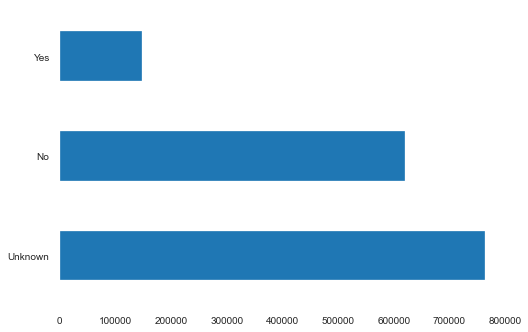

In [25]:
df['Consumer_disputed'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')



In [1]:
# df["Timely_response"].unique()
# df['Timely_response?'].value_counts()

<AxesSubplot:>

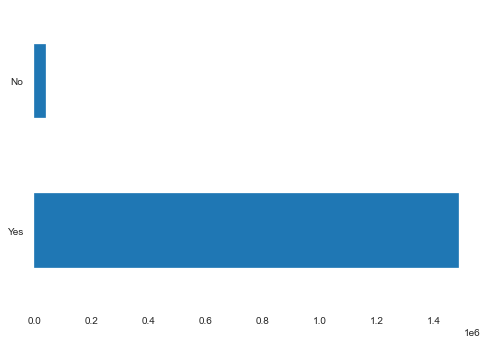

In [27]:
df['Timely_response'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')



In [28]:
df.shape

(1531946, 18)

In [29]:
df['Product'].value_counts().sort_values(ascending=False).to_dict()


{'Credit reporting, credit repair services, or other personal consumer reports': 352638,
 'Mortgage': 299118,
 'Debt collection': 283630,
 'Credit reporting': 140432,
 'Credit card': 89190,
 'Bank account or service': 86206,
 'Credit card or prepaid card': 69614,
 'Checking or savings account': 64103,
 'Student loan': 56886,
 'Consumer Loan': 31604,
 'Vehicle loan or lease': 15902,
 'Money transfer, virtual currency, or money service': 14479,
 'Payday loan, title loan, or personal loan': 12351,
 'Payday loan': 5543,
 'Money transfers': 5354,
 'Prepaid card': 3819,
 'Other financial service': 1059,
 'Virtual currency': 18}

<AxesSubplot:>

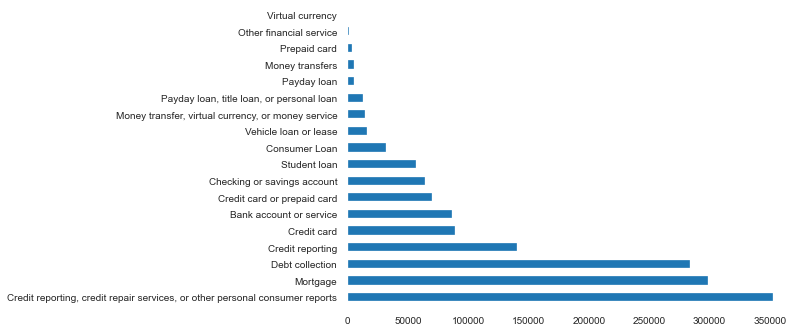

In [30]:
df['Product'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')



#### What are the top 10 issues and sub issues?

[Text(0.5, 0, 'Number of Complaints'),
 Text(0, 0.5, 'Issue'),
 Text(0.5, 1.0, 'Top 10 Issues')]

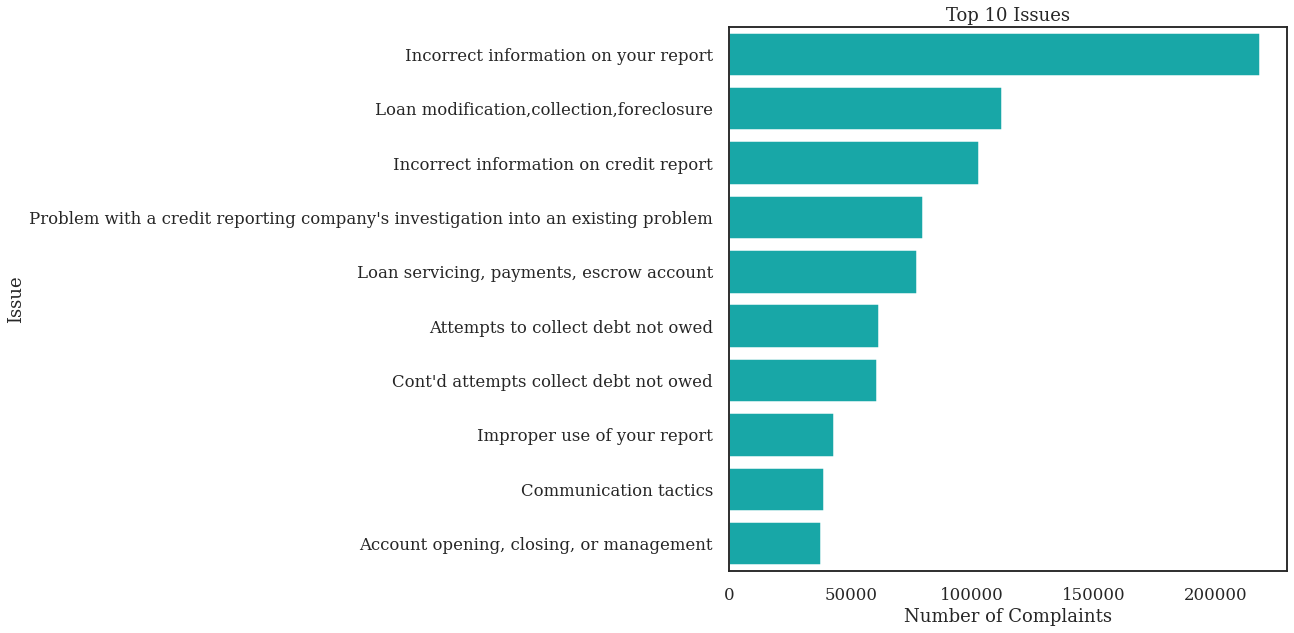

In [31]:
fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
plt.rcParams['font.family'] = "serif"

issue_count=df['Issue'].str.strip("'").value_counts()[0:10]
issue_c=pd.DataFrame({'Issue':issue_count.index, 'Vals':issue_count.values})

# f, ax = plt.subplots(figsize=(7, 3))
g = sns.barplot(x=issue_c['Vals'], y=issue_c['Issue'], ci=None, color="c")
g.set(xlabel= "Number of Complaints", ylabel="Issue", title = "Top 10 Issues")


# g.set_xticklabels(rotation=30)

# for item in g.get_xticklabels():
#     item.set_rotation(45)

### Top 10 companies with the max number of consumer complaints

[Text(0.5, 0, 'Number of Complaints'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Top 10 Companies with consumer complaints')]

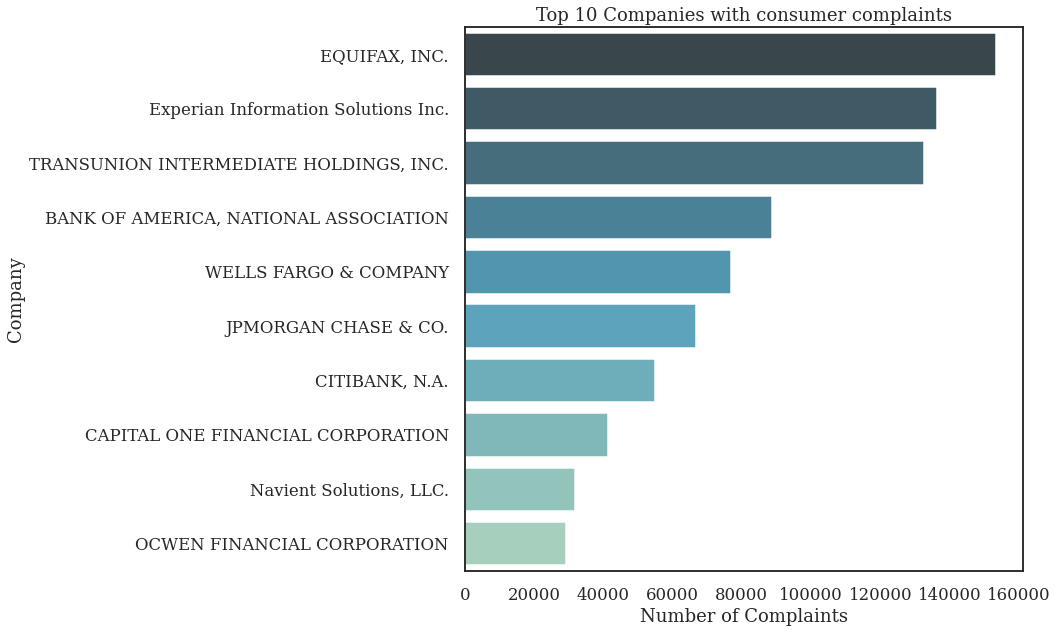

In [32]:
# sns.palplot(sns.color_palette("GnBu_d"))

fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
plt.rcParams['font.family'] = "serif"

comp_ten=df['Company'].str.strip("'").value_counts()[0:10]
c_topten=pd.DataFrame({'Company':comp_ten.index, 'Vals':comp_ten.values})

# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#d6ff78", "#90c418", "#cc1818", "#000000", "#fc8b00", "#fcdf00", "#fc00df", "#ef95fc","#2707f7","#57f707","#f7076f","#344ce3"]
g = sns.barplot(x=c_topten['Vals'], y=c_topten['Company'], ci=None, palette="GnBu_d")
g.set(xlabel= "Number of Complaints", ylabel="Company", title = "Top 10 Companies with consumer complaints")



# ax = sns.countplot(x="Company", data=df, palette="Set3")



### Top Product categories with high number of complaints

[Text(0.5, 0, 'Number of Complaints'),
 Text(0, 0.5, 'Company'),
 Text(0.5, 1.0, 'Top Product categories with consumer complaints')]

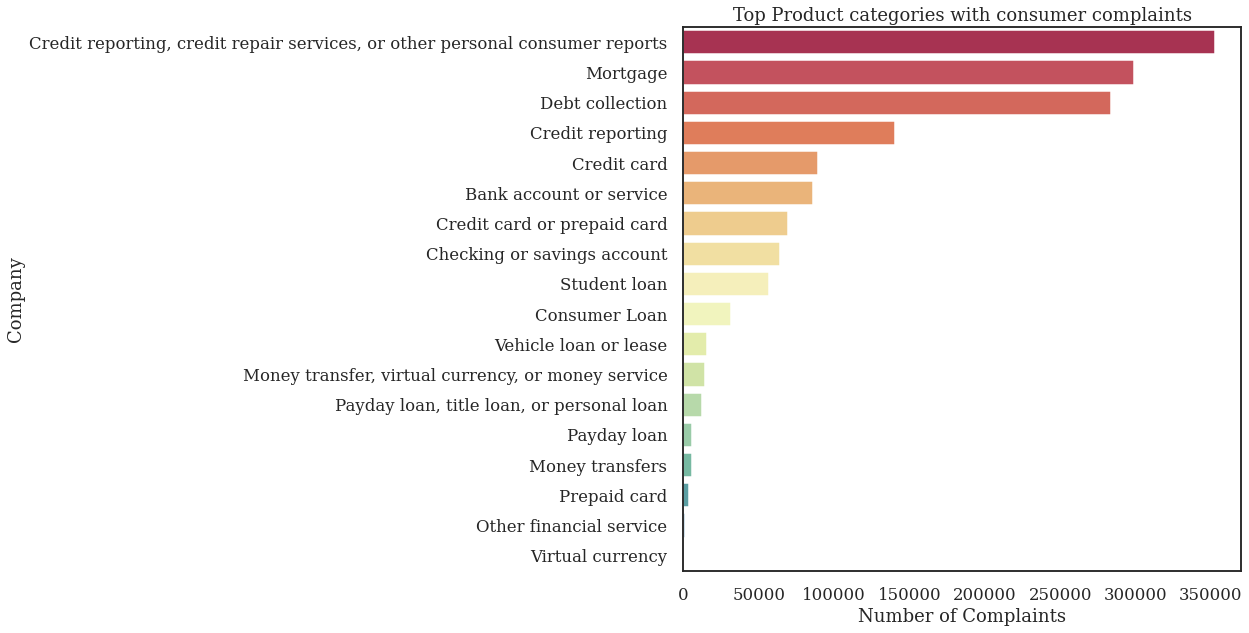

In [33]:
# sns.palplot(sns.color_palette("GnBu_d"))
fig = plt.figure(figsize=(10,10))
sns.set_context('talk')
plt.rcParams['font.family'] = "serif"

prod=df['Product'].str.strip("'").value_counts()
p=pd.DataFrame({'Product':prod.index, 'Vals':prod.values})

# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#d6ff78", "#90c418", "#cc1818", "#000000", "#fc8b00", "#fcdf00", "#fc00df", "#ef95fc","#2707f7","#57f707","#f7076f","#344ce3"]
g = sns.barplot(x=p['Vals'], y=p['Product'], ci=None, palette="Spectral")
g.set(xlabel= "Number of Complaints", ylabel="Company", title = "Top Product categories with consumer complaints")

In [34]:
# df['Company'].str.strip("'").value_counts()[0:10]

# sns.set(style='white')
# df['Company'].str.strip("'").value_counts()[0:10].iplot(kind='bar',color='#FF6692',title='Top 10 Companies with highest complaints',
#                                                         fontsize=10,
#                                                         dimensions=(500, 1100),world_readable=True)



In [35]:
# import seaborn as sns 
# # fig = plt.figure(figsize=(10,10))


# sns.set(style='white')
# df['Issue'].str.strip("'").value_counts()[0:10].iplot(kind='bar',title='Top 10 issues',fontsize=10,color='#FF6692',dimensions=(500, 1100),world_readable=True)

# # color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"]

In [36]:
# df['Sub_issue'].str.strip("'").value_counts()[0:10].iplot(kind='bar',
#                                                           title='Top 10 Sub Issues',fontsize=14,color='#9370DB')


(-0.5, 2999.5, 1999.5, -0.5)

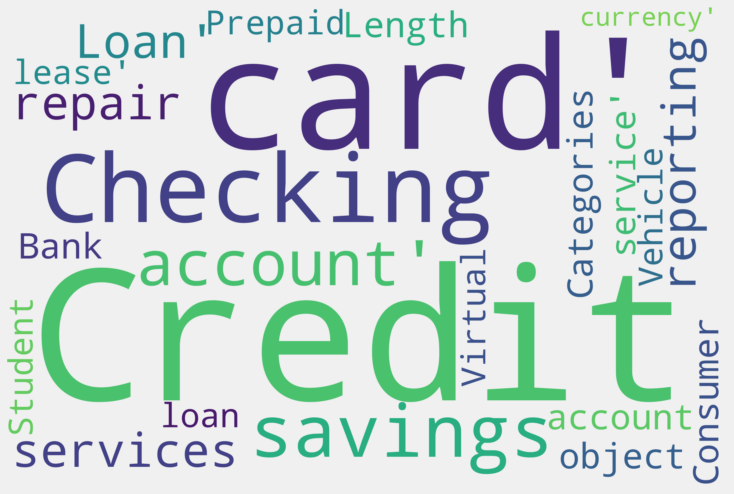

In [37]:
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
text = df['Product'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = '#F0F0F0',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (10, 8),
    facecolor = '#F0F0F0',
    edgecolor = '#F0F0F0')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

<AxesSubplot:>

Text(0.5, 1.0, 'Main Issues with Disputes')

(-0.5, 399.5, 199.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'Main Issues without Disputes')

(-0.5, 399.5, 199.5, -0.5)

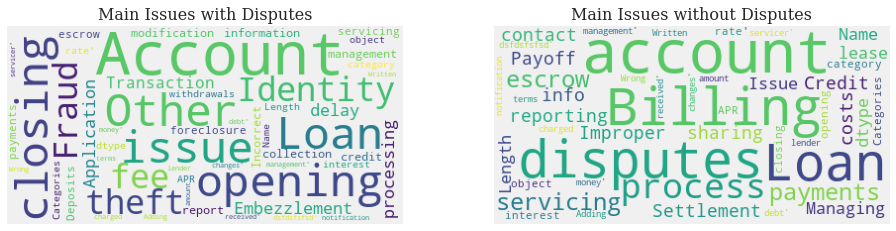

In [38]:
stopwords = set(STOPWORDS)

# Main Issue in Disputes - plot 1
disputes_issue = df['Issue'].loc[df['Consumer_disputed'] == 'Yes']

disputed_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=300,
    max_font_size=60, 
    random_state=42
    ).generate(str(disputes_issue)
)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud)
plt.title('Main Issues with Disputes', fontsize=16)
plt.axis('off')


#  Issue with NO Disputes - plot 2
nodisputes_issue = df['Issue'].loc[df['Consumer_disputed'] == 'No']

nodispute_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=300,
    max_font_size=60, 
    random_state=42
    ).generate(str(nodisputes_issue))

fig.add_subplot(222)
plt.imshow(nodispute_wordcloud)
plt.title('Main Issues without Disputes', fontsize=16)
plt.axis('off')



<AxesSubplot:>

Text(0.5, 1.0, 'Main Issues with Unknown Disputes')

(-0.5, 399.5, 199.5, -0.5)

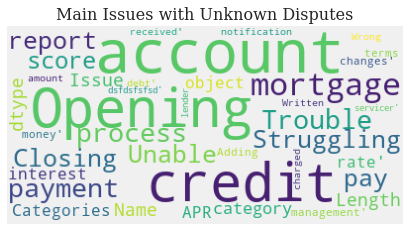

In [39]:
#  Issue with UNKNOWN Disputes - plot 3
unknowndisputes_issue = df['Issue'].loc[df['Consumer_disputed'] == 'Unknown']

Unknowndispute_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=300,
    max_font_size=60, 
    random_state=42
    ).generate(str(unknowndisputes_issue))

fig = plt.figure(figsize=(16,8))

fig.add_subplot(222)
plt.imshow(Unknowndispute_wordcloud)
plt.title('Main Issues with Unknown Disputes', fontsize=16)
plt.axis('off')
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Bank of America Disputes')

(-0.5, 399.5, 199.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'Wells Fargo & Company Disputes')

(-0.5, 399.5, 199.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'JP Morgan Chase & Co.')

(-0.5, 399.5, 199.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'Equifax')

(-0.5, 399.5, 199.5, -0.5)

<AxesSubplot:>

Text(0.5, 1.0, 'CitiBank')

(-0.5, 399.5, 199.5, -0.5)

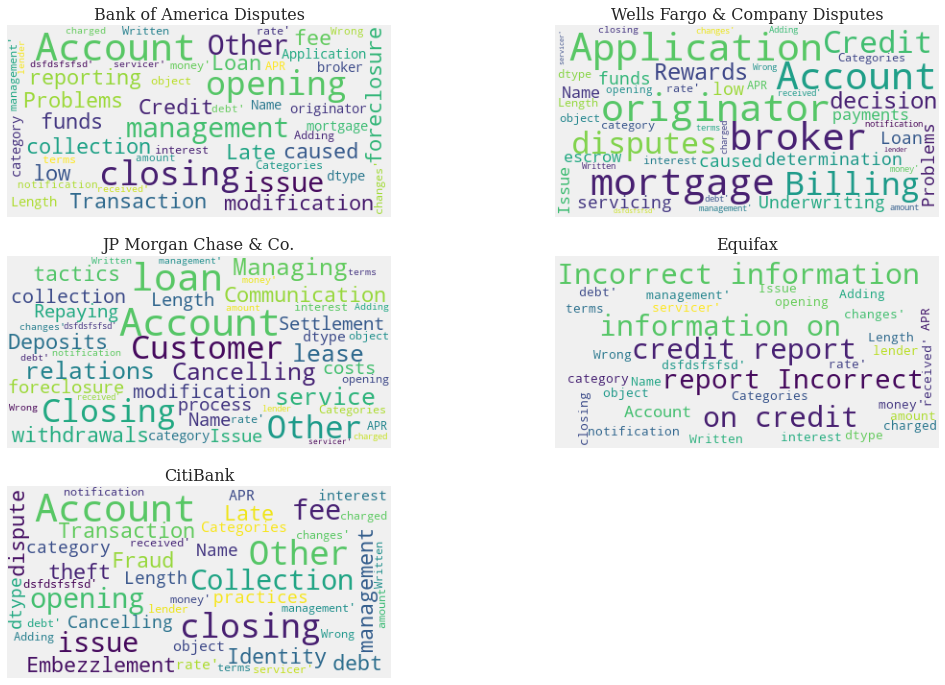

In [40]:
boa_dis = df['Issue'].loc[(df['Consumer_disputed'] == 'Yes') & (df['Company'] == "BANK OF AMERICA, NATIONAL ASSOCIATION")]
wfc_dis = df['Issue'].loc[(df['Consumer_disputed'] == 'Yes') & (df['Company'] == "WELLS FARGO & COMPANY")]
jpm_dis = df['Issue'].loc[(df['Consumer_disputed'] == 'Yes') & (df['Company'] == "JPMORGAN CHASE & CO.")] 
equi_dis = df['Issue'].loc[(df['Consumer_disputed'] == 'Yes') & (df['Company'] == "EQUIFAX, INC.")]
citi_dis = df['Issue'].loc[(df['Consumer_disputed'] == 'Yes') & (df['Company'] == "CITIBANK, N.A.")]


# Create Subplots of Wordclouds
fig = plt.figure(figsize=(18,12))

# First Subplot
plt.subplot(3, 2, 1)
boa_disputed_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=500,
    max_font_size=40, 
    random_state=42
    ).generate(str(boa_dis)
)

plt.imshow(boa_disputed_wordcloud)
plt.title('Bank of America Disputes', fontsize=16)
plt.axis('off')

# Second Subplot
plt.subplot(3, 2, 2)
wfc_disputed_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=500,
    max_font_size=40, 
    random_state=42
    ).generate(str(wfc_dis)
)

plt.imshow(wfc_disputed_wordcloud)
plt.title('Wells Fargo & Company Disputes', fontsize=16)
plt.axis('off')

plt.subplot(3, 2, 3)
jpm_disputed_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=500,
    max_font_size=40, 
    random_state=42
    ).generate(str(jpm_dis)
)

plt.imshow(jpm_disputed_wordcloud)
plt.title('JP Morgan Chase & Co.', fontsize=16)
plt.axis('off')


plt.subplot(3, 2, 4)
equi_disputed_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=500,
    max_font_size=40, 
    random_state=42
    ).generate(str(equi_dis)
)

plt.imshow(equi_disputed_wordcloud)
plt.title('Equifax', fontsize=16)
plt.axis('off')

plt.subplot(3, 2, 5)
citi_disputed_wordcloud = WordCloud(
    background_color='#F0F0F0',
    stopwords=stopwords,
    max_words=500,
    max_font_size=40, 
    random_state=42
    ).generate(str(citi_dis)
)

plt.imshow(citi_disputed_wordcloud)
plt.title('CitiBank', fontsize=16)
plt.axis('off')

#### what is how much % of the total:1531946

1. <b>tags</b>: has <B>86.506965650225%</B> of NAN vals.
2. <b>Consumer_complaint_narrative</b>: has 1020401 NAN vals which is <b>66.608157206586%</b> of total(1531946).
3. <b>Company_public_response</b>: has 953547 NAN vals which is <b>62.244165264311%</b> of 1531946.
4. <b>Consumer_disputed?</b>: has 763467 NAN vals which is <b>49.836417210528%</b> of 1531946.
5. <b>Consumer_consent_provided</b>: has 610666 NAN vals which is <b>39.862110022155%</b> of 1531946
6. <b>Sub-issue</b>: has 555857 NAN vals which is <b>36.284372947872%</b> of 1531946.
7. <b>ZIPcode</b>: has 376376 NAN vals which is <b>24.56849001205%</b> of 1531946.
8. <b>State</b>: has 350927 NAN vals which is <b>22.907269577387%</b> of 1531946.
9. <b>Sub-product</b>: 235165 NAN vals which is <b>15.35073690587%</b> of 1531946.










# Time series and col: No. of days taken to resolve

In [41]:
df.head()

ts = df.copy()

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIPcode,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID
0,2012-01-30,Credit card,NaN,Payoff process,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,FL,33634,NaN,NaN,Web,2012-01-31,Closed with relief,Yes,No,18663
1,2013-08-07,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"FIRST HAWAIIAN, INC.",HI,96816,NaN,NaN,Web,2013-08-07,Closed with explanation,Yes,No,482822
2,2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,2011-12-11,Closed with relief,Yes,No,2329
3,2013-05-16,Credit card,NaN,Billing disputes,NaN,NaN,NaN,DISCOVER BANK,LA,70809,NaN,NaN,Web,2013-05-17,Closed with explanation,Yes,No,409064
4,2013-02-19,Credit card,NaN,Credit reporting,NaN,NaN,NaN,SYNCHRONY FINANCIAL,VA,22546,NaN,NaN,Web,2013-02-21,Closed with non-monetary relief,Yes,No,318532


In [42]:
ts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531946 entries, 0 to 1531945
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   Date_received                 1531946 non-null  category
 1   Product                       1531946 non-null  category
 2   Sub_product                   1296781 non-null  category
 3   Issue                         1531946 non-null  category
 4   Sub_issue                     976089 non-null   category
 5   Consumer_complaint_narrative  511545 non-null   category
 6   Company_public_response       578399 non-null   category
 7   Company                       1531946 non-null  category
 8   State                         1181019 non-null  object  
 9   ZIPcode                       1155570 non-null  object  
 10  Tags                          206706 non-null   object  
 11  Consumer_consent_provided     921280 non-null   category
 12  Submitted_via 

In [43]:
ts['Date_received'] = ts.Date_received.astype('datetime64[ns]')
ts['Date_sent_to_company'] = ts.Date_sent_to_company.astype('datetime64[ns]')





In [44]:
ts['Number of days'] = (ts['Date_sent_to_company'] - ts['Date_received']) 
ts['Number of days']

0          1 days
1          0 days
2         10 days
3          1 days
4          2 days
            ...  
1531941    0 days
1531942    0 days
1531943    0 days
1531944    0 days
1531945    0 days
Name: Number of days, Length: 1531946, dtype: timedelta64[ns]

In [45]:
ts['Number_of_days'] = (ts['Date_sent_to_company'] - ts['Date_received'])// np.timedelta64(1, 'D')
ts['Number_of_days']


0           1
1           0
2          10
3           1
4           2
           ..
1531941     0
1531942     0
1531943     0
1531944     0
1531945     0
Name: Number_of_days, Length: 1531946, dtype: int64

In [46]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1531946 entries, 0 to 1531945
Data columns (total 20 columns):
 #   Column                        Non-Null Count    Dtype          
---  ------                        --------------    -----          
 0   Date_received                 1531946 non-null  datetime64[ns] 
 1   Product                       1531946 non-null  category       
 2   Sub_product                   1296781 non-null  category       
 3   Issue                         1531946 non-null  category       
 4   Sub_issue                     976089 non-null   category       
 5   Consumer_complaint_narrative  511545 non-null   category       
 6   Company_public_response       578399 non-null   category       
 7   Company                       1531946 non-null  category       
 8   State                         1181019 non-null  object         
 9   ZIPcode                       1155570 non-null  object         
 10  Tags                          206706 non-null   object

In [47]:
ts.describe()


,Complaint_ID,Number of days,Number_of_days
count,1.531946e+06,1531946,1.531946e+06
mean,2.377496e+06,2 days 19:33:26.017966690,2.814884e+00
std,1.253335e+06,13 days 22:03:14.770058739,1.391892e+01
min,1.000000e+00,-85 days +00:00:00,-8.500000e+01
25%,1.333746e+06,0 days 00:00:00,0.000000e+00
50%,2.441295e+06,0 days 00:00:00,0.000000e+00
75%,3.609077e+06,2 days 00:00:00,2.000000e+00
max,4.141455e+06,1962 days 00:00:00,1.962000e+03


In [48]:
# ts['Number_of_days'].max()
# ts['Number_of_days'].min()

# print(ts[ts['Number_of_days']==1962])
# print(ts[ts['Number_of_days']==-85])

<AxesSubplot:xlabel='Number_of_days'>

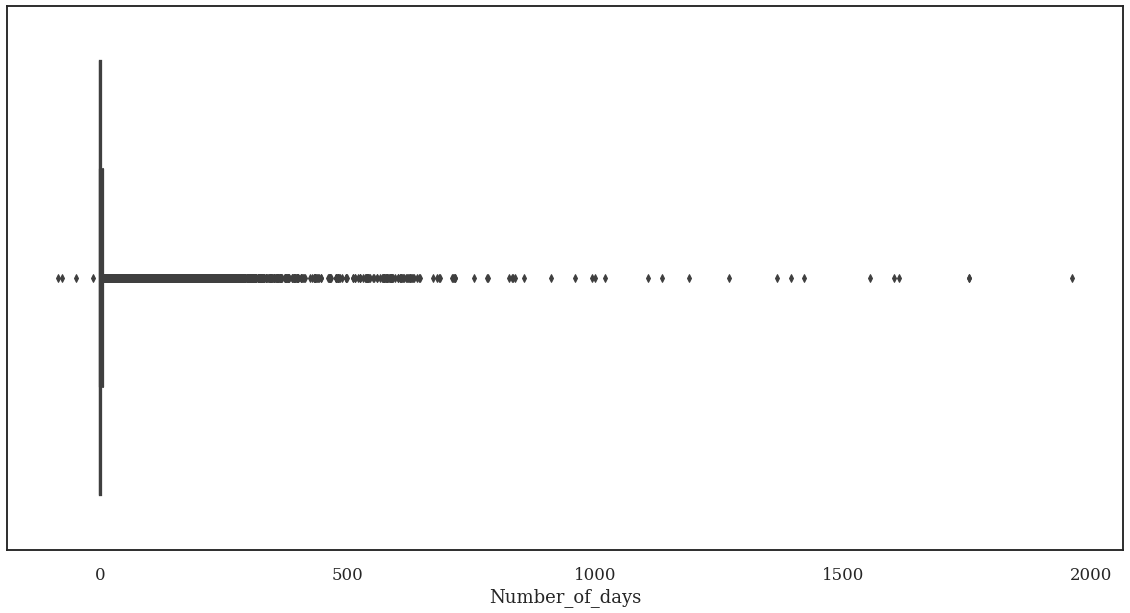

In [49]:
a4_dims = (20,10)
f, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x=ts['Number_of_days'])

- we note that the number of days taken to resolve an issue varies -ve to 2000+ days which is rather odd

In [50]:
ts.Date_received.describe()
ts.Date_sent_to_company.describe()

count                 1531946
unique                   3125
top       2017-09-08 00:00:00
freq                     3553
first     2011-12-01 00:00:00
last      2020-06-25 00:00:00
Name: Date_received, dtype: object

count                 1531946
unique                   3074
top       2017-09-08 00:00:00
freq                     3387
first     2011-12-01 00:00:00
last      2020-06-25 00:00:00
Name: Date_sent_to_company, dtype: object

### Indexed with Date_received - ts1

In [51]:
ts_date_received = ts.set_index('Date_received')
ts_date_received.head()


,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIPcode,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Number of days,Number_of_days
Date_received,,,,,,,,,,,,,,,,,,,
2012-01-30,Credit card,NaN,Payoff process,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,FL,33634,NaN,NaN,Web,2012-01-31,Closed with relief,Yes,No,18663,1 days,1
2013-08-07,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"FIRST HAWAIIAN, INC.",HI,96816,NaN,NaN,Web,2013-08-07,Closed with explanation,Yes,No,482822,0 days,0
2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,2011-12-11,Closed with relief,Yes,No,2329,10 days,10
2013-05-16,Credit card,NaN,Billing disputes,NaN,NaN,NaN,DISCOVER BANK,LA,70809,NaN,NaN,Web,2013-05-17,Closed with explanation,Yes,No,409064,1 days,1
2013-02-19,Credit card,NaN,Credit reporting,NaN,NaN,NaN,SYNCHRONY FINANCIAL,VA,22546,NaN,NaN,Web,2013-02-21,Closed with non-monetary relief,Yes,No,318532,2 days,2


In [52]:
ts_date_received['Year'] = ts_date_received.index.year
ts_date_received['Month'] = ts_date_received.index.month
ts_date_received['Weekday_Name'] = ts_date_received.index.day_name()


<AxesSubplot:xlabel='Date_received'>

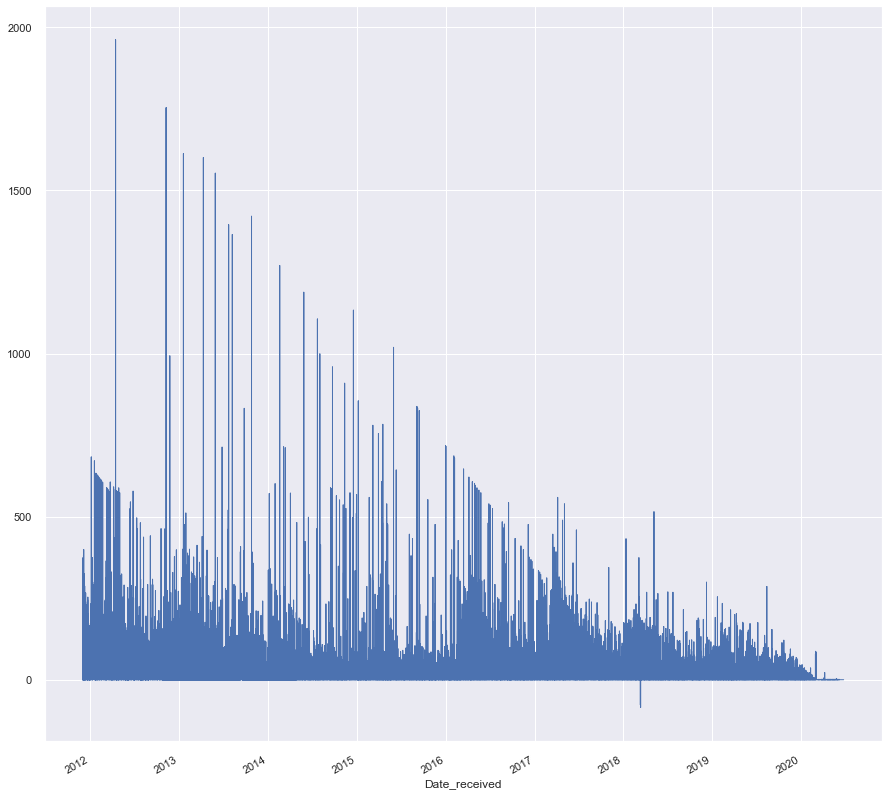

In [53]:
sns.set(rc={'figure.figsize':(15, 15)})
ts_date_received['Number_of_days'].plot(linewidth=1)
# ts_date_received['Number_of_days'].plot(linewidth=0.5)




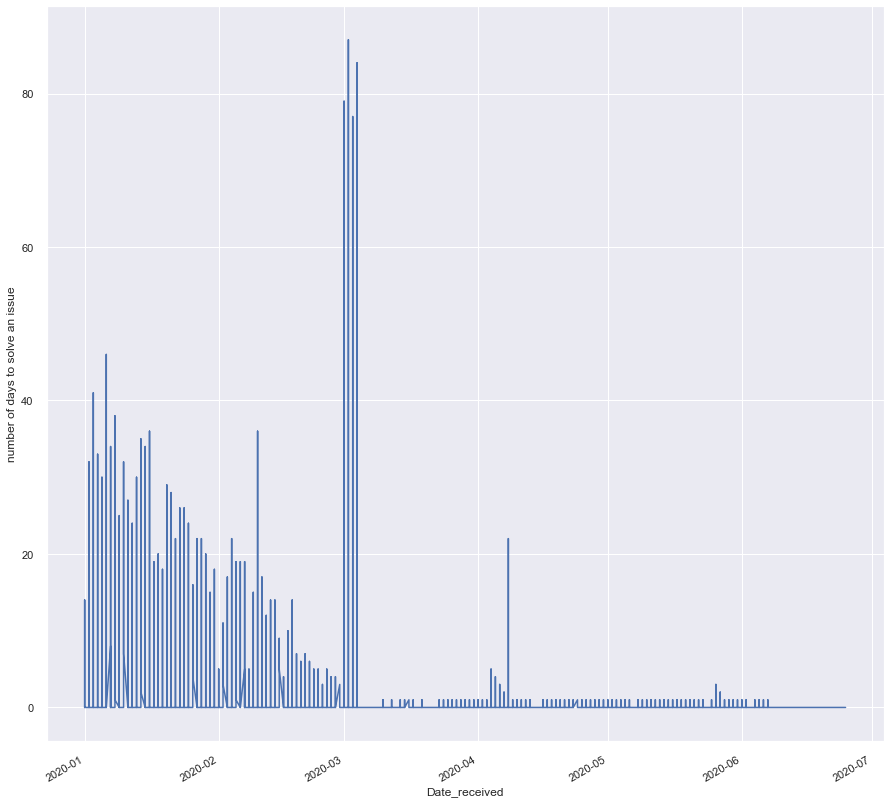

In [54]:
ax = ts_date_received.loc['2020', 'Number_of_days'].plot()
ax.set_ylabel('number of days to solve an issue');

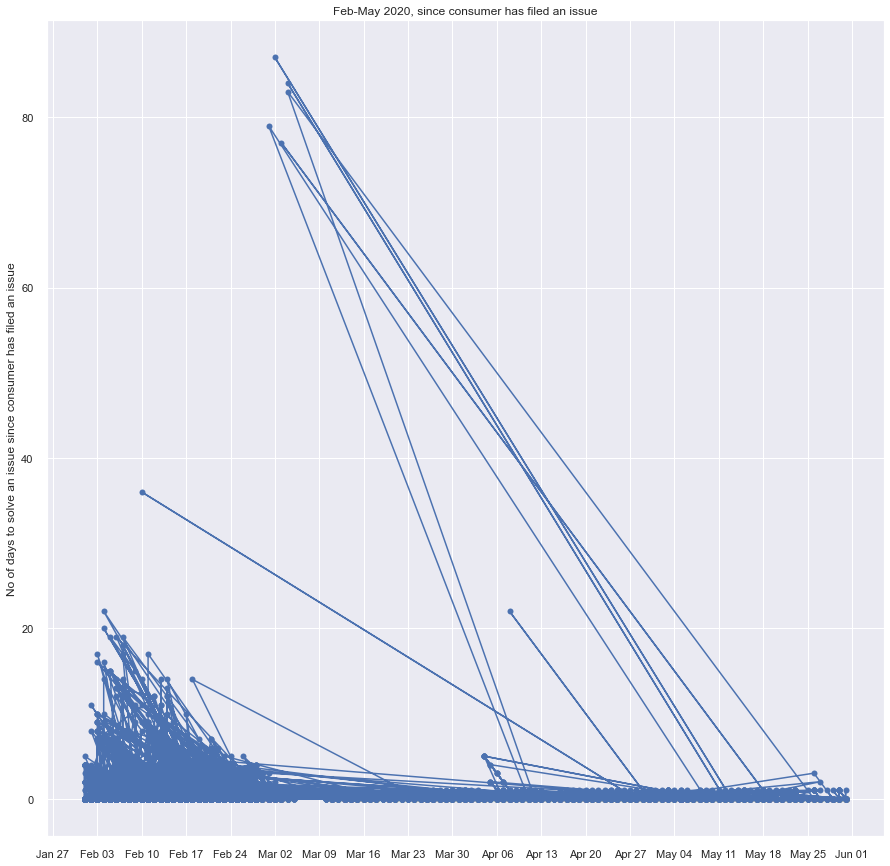

In [55]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(ts_date_received.loc['2020-02':'2020-05', 'Number_of_days'], marker='o', linestyle='-')
ax.set_ylabel('No of days to solve an issue since consumer has filed an issue')
ax.set_title('Feb-May 2020, since consumer has filed an issue')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Indexed with Date_sent_to_company - ts2

In [56]:
ts_date_sent_to_comp = ts.set_index('Date_sent_to_company')
ts_date_sent_to_comp.head()

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIPcode,Tags,Consumer_consent_provided,Submitted_via,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Number of days,Number_of_days
Date_sent_to_company,,,,,,,,,,,,,,,,,,,
2012-01-31,2012-01-30,Credit card,NaN,Payoff process,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,FL,33634,NaN,NaN,Web,Closed with relief,Yes,No,18663,1 days,1
2013-08-07,2013-08-07,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"FIRST HAWAIIAN, INC.",HI,96816,NaN,NaN,Web,Closed with explanation,Yes,No,482822,0 days,0
2011-12-11,2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,Closed with relief,Yes,No,2329,10 days,10
2013-05-17,2013-05-16,Credit card,NaN,Billing disputes,NaN,NaN,NaN,DISCOVER BANK,LA,70809,NaN,NaN,Web,Closed with explanation,Yes,No,409064,1 days,1
2013-02-21,2013-02-19,Credit card,NaN,Credit reporting,NaN,NaN,NaN,SYNCHRONY FINANCIAL,VA,22546,NaN,NaN,Web,Closed with non-monetary relief,Yes,No,318532,2 days,2


In [57]:
ts_date_sent_to_comp['Year'] = ts_date_sent_to_comp.index.year
ts_date_sent_to_comp['Month'] = ts_date_sent_to_comp.index.month
ts_date_sent_to_comp['Weekday_Name'] = ts_date_sent_to_comp.index.day_name()



<AxesSubplot:xlabel='Date_sent_to_company'>

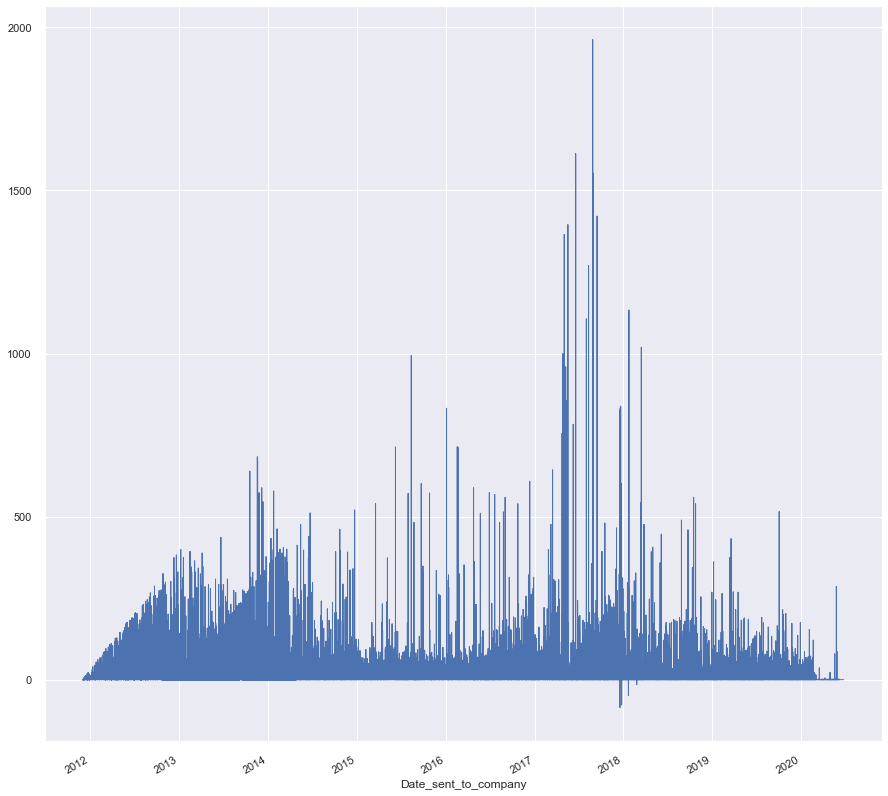

In [58]:
sns.set(rc={'figure.figsize':(15, 15)})
ts_date_sent_to_comp['Number_of_days'].plot(linewidth=1)
# ts_date_received['Number_of_days'].plot(linewidth=0.5)




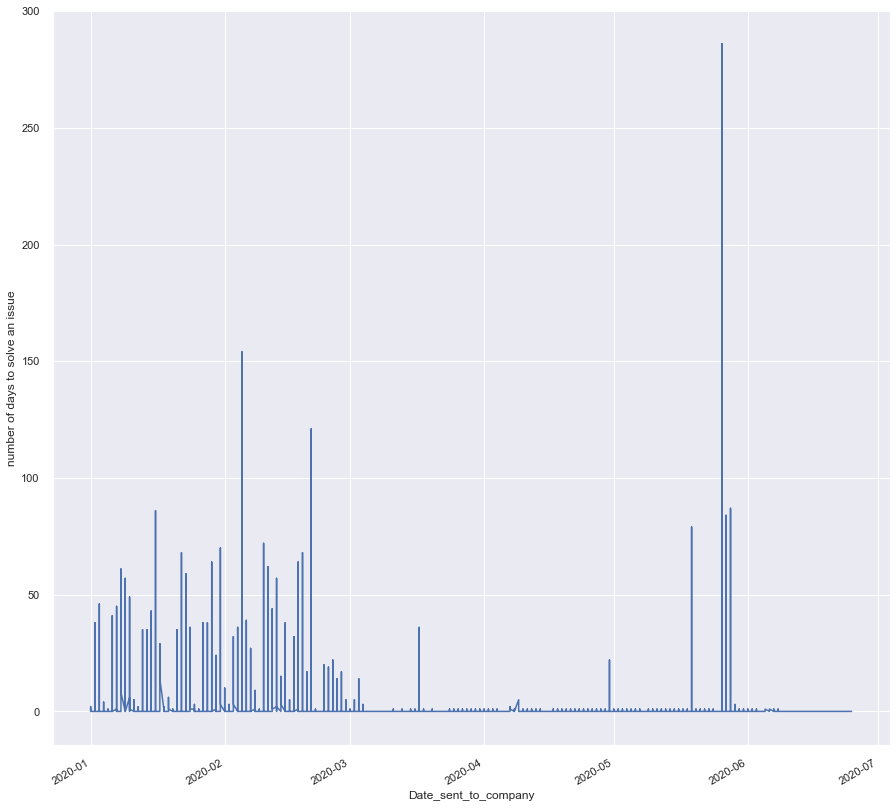

In [59]:
ax = ts_date_sent_to_comp.loc['2020', 'Number_of_days'].plot()
ax.set_ylabel('number of days to solve an issue');

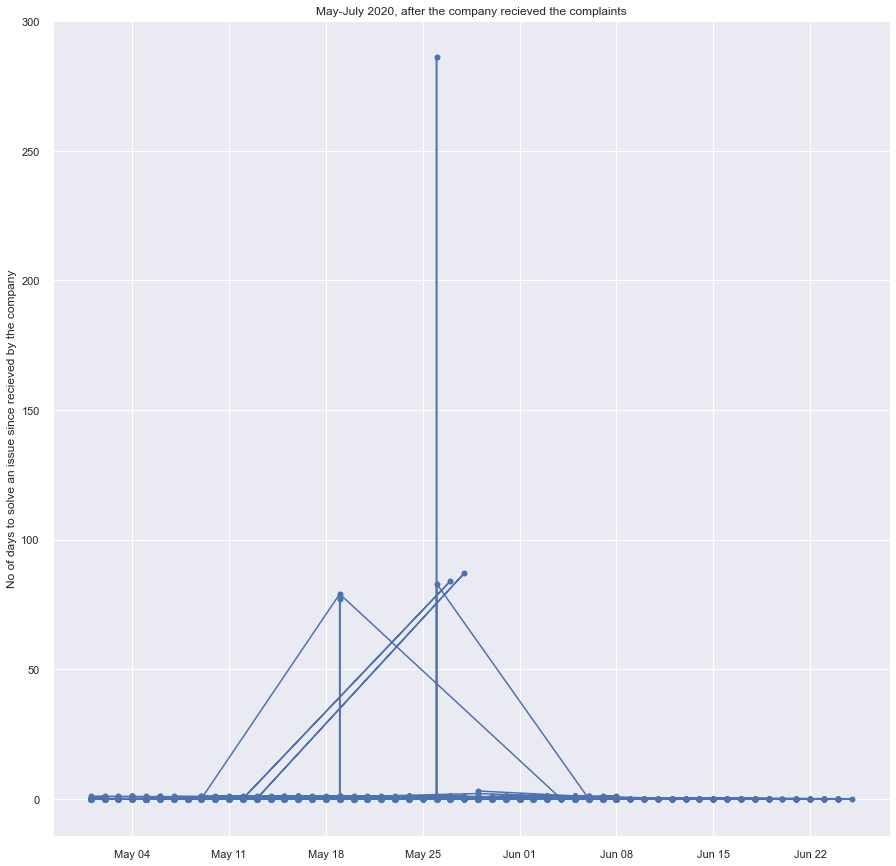

In [60]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(ts_date_sent_to_comp.loc['2020-05':'2020-07', 'Number_of_days'], marker='o', linestyle='-')
ax.set_ylabel('No of days to solve an issue since recieved by the company')
ax.set_title('May-July 2020, after the company recieved the complaints')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Random Forest Algorithm for feature extraction for the no of days to resolve consumer issue

In [61]:
reg=ts.copy()
reg.head()
reg.shape

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIPcode,Tags,Consumer_consent_provided,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response,Consumer_disputed,Complaint_ID,Number of days,Number_of_days
0,2012-01-30,Credit card,NaN,Payoff process,NaN,NaN,NaN,BARCLAYS BANK DELAWARE,FL,33634,NaN,NaN,Web,2012-01-31,Closed with relief,Yes,No,18663,1 days,1
1,2013-08-07,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"FIRST HAWAIIAN, INC.",HI,96816,NaN,NaN,Web,2013-08-07,Closed with explanation,Yes,No,482822,0 days,0
2,2011-12-01,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",WA,98275,NaN,NaN,Web,2011-12-11,Closed with relief,Yes,No,2329,10 days,10
3,2013-05-16,Credit card,NaN,Billing disputes,NaN,NaN,NaN,DISCOVER BANK,LA,70809,NaN,NaN,Web,2013-05-17,Closed with explanation,Yes,No,409064,1 days,1
4,2013-02-19,Credit card,NaN,Credit reporting,NaN,NaN,NaN,SYNCHRONY FINANCIAL,VA,22546,NaN,NaN,Web,2013-02-21,Closed with non-monetary relief,Yes,No,318532,2 days,2


(1531946, 20)

In [62]:
reg.drop('Sub_product', axis=1, inplace=True)
reg.drop('Sub_issue', axis=1, inplace=True)
reg.drop('Consumer_complaint_narrative', axis=1, inplace=True)
reg.drop('Company_public_response', axis=1, inplace=True)
reg.drop('ZIPcode', axis=1, inplace=True)
reg.drop('Tags', axis=1, inplace=True)
reg.drop('Consumer_consent_provided', axis=1, inplace=True)
reg.drop('Complaint_ID', axis=1, inplace=True)

In [63]:
reg.isna().sum()
reg.shape

Date_received                        0
Product                              0
Issue                                0
Company                              0
State                           350927
Submitted_via                        0
Date_sent_to_company                 0
Company_response_to_consumer         1
Timely_response                      0
Consumer_disputed                    0
Number of days                       0
Number_of_days                       0
dtype: int64

(1531946, 12)

In [64]:
reg.dropna(inplace=True)

In [65]:
len(reg['Number_of_days'].unique())

497

Classifying Number_of_days column into 6 groups:
- Group1: Very Early resolution [-100 to -1 values]
- Group2: On time resolution [0 values]
- Group3: resolution in 100days [1 to 100 values]
- Group4: resolution in 300 days [101 to 400 values]
- Group5: resolution in 500 days [ 401 to 900 values]
- Group6: resolution in 1100 days [ 901 to 2000 values]

In [66]:
# df.Number_of_days.replace(to_replace =, value ="Omega Warrior")
reg['Num_days'] = pd.cut(reg.Number_of_days, bins=[-100,-1,0,100,400,900,2000], labels=[1,2,3,4,5,6])
reg['Num_days']

0          3
1          2
2          3
3          3
4          3
          ..
1531930    2
1531931    2
1531932    2
1531934    2
1531940    2
Name: Num_days, Length: 1181018, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [67]:
reg = pd.get_dummies(reg, 
                            columns=['Timely_response', 'Consumer_disputed'])
reg.head(2)
reg.shape


,Date_received,Product,Issue,Company,State,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Number of days,Number_of_days,Num_days,Timely_response_No,Timely_response_Yes,Consumer_disputed_No,Consumer_disputed_Unknown,Consumer_disputed_Yes
0,2012-01-30,Credit card,Payoff process,BARCLAYS BANK DELAWARE,FL,Web,2012-01-31,Closed with relief,1 days,1,3,0,1,1,0,0
1,2013-08-07,Credit card,Billing disputes,"FIRST HAWAIIAN, INC.",HI,Web,2013-08-07,Closed with explanation,0 days,0,2,0,1,1,0,0


(1181018, 16)

In [68]:
# label encoding
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

reg['Product'] = le.fit_transform(reg['Product'])
reg['Issue'] = le.fit_transform(reg['Issue'])
reg['Company'] = le.fit_transform(reg['Company'])
reg['State'] = le.fit_transform(reg['State'])
reg['Submitted_via'] = le.fit_transform(reg['Submitted_via'])
reg['Company_response_to_consumer'] = le.fit_transform(reg['Company_response_to_consumer'])

In [69]:
reg.drop('Number of days', axis=1, inplace=True)
reg.drop('Number_of_days', axis=1, inplace=True)

In [70]:
reg.head(2)

,Date_received,Product,Issue,Company,State,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Num_days,Timely_response_No,Timely_response_Yes,Consumer_disputed_No,Consumer_disputed_Unknown,Consumer_disputed_Yes
0,2012-01-30,3,108,605,13,5,2012-01-31,4,3,0,1,1,0,0
1,2013-08-07,3,18,1796,17,5,2013-08-07,1,2,0,1,1,0,0


In [71]:
import datetime as dt

reg['Num_days'] = reg.Num_days.astype('float64')


y_clf = reg['Num_days'] # dependent var
x_clf = reg[["Date_received","Product","Issue","Company","State","Submitted_via","Date_sent_to_company","Company_response_to_consumer","Timely_response_No","Timely_response_Yes","Consumer_disputed_No","Consumer_disputed_Unknown","Consumer_disputed_Yes"]]
x_clf['Date_received']=x_clf['Date_received'].map(dt.datetime.toordinal)
x_clf['Date_sent_to_company']=x_clf['Date_sent_to_company'].map(dt.datetime.toordinal)



x_clf.info()
x_clf.head()


y_clf.head()

X=x_clf
y=y_clf
X.shape
y.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181018 entries, 0 to 1531940
Data columns (total 13 columns):
 #   Column                        Non-Null Count    Dtype
---  ------                        --------------    -----
 0   Date_received                 1181018 non-null  int64
 1   Product                       1181018 non-null  int64
 2   Issue                         1181018 non-null  int64
 3   Company                       1181018 non-null  int64
 4   State                         1181018 non-null  int64
 5   Submitted_via                 1181018 non-null  int64
 6   Date_sent_to_company          1181018 non-null  int64
 7   Company_response_to_consumer  1181018 non-null  int64
 8   Timely_response_No            1181018 non-null  uint8
 9   Timely_response_Yes           1181018 non-null  uint8
 10  Consumer_disputed_No          1181018 non-null  uint8
 11  Consumer_disputed_Unknown     1181018 non-null  uint8
 12  Consumer_disputed_Yes         1181018 non-null  uint8
dt

,Date_received,Product,Issue,Company,State,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_No,Timely_response_Yes,Consumer_disputed_No,Consumer_disputed_Unknown,Consumer_disputed_Yes
0,734532,3,108,605,13,5,734533,4,0,1,1,0,0
1,735087,3,18,1796,17,5,735087,1,0,1,1,0,0
2,734472,3,18,896,59,5,734482,4,0,1,1,0,0
3,735004,3,18,1466,24,5,735005,1,0,1,1,0,0
4,734918,3,48,4283,56,5,734920,3,0,1,1,0,0


0    3.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: Num_days, dtype: float64

(1181018, 13)

(1181018,)

<AxesSubplot:xlabel='State', ylabel='Num_days'>

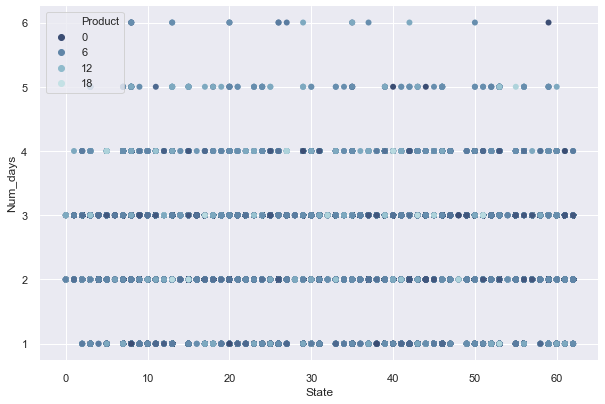

In [72]:
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="State", y="Num_days",
                hue="Product",
                palette="ch:r=-.2,d=.3_r",
                hue_order="Product",
                sizes=(1, 8), linewidth=0,
                data=reg, ax=ax)



<Figure size 1800x1800 with 0 Axes>

<AxesSubplot:>

(1181018, 14)

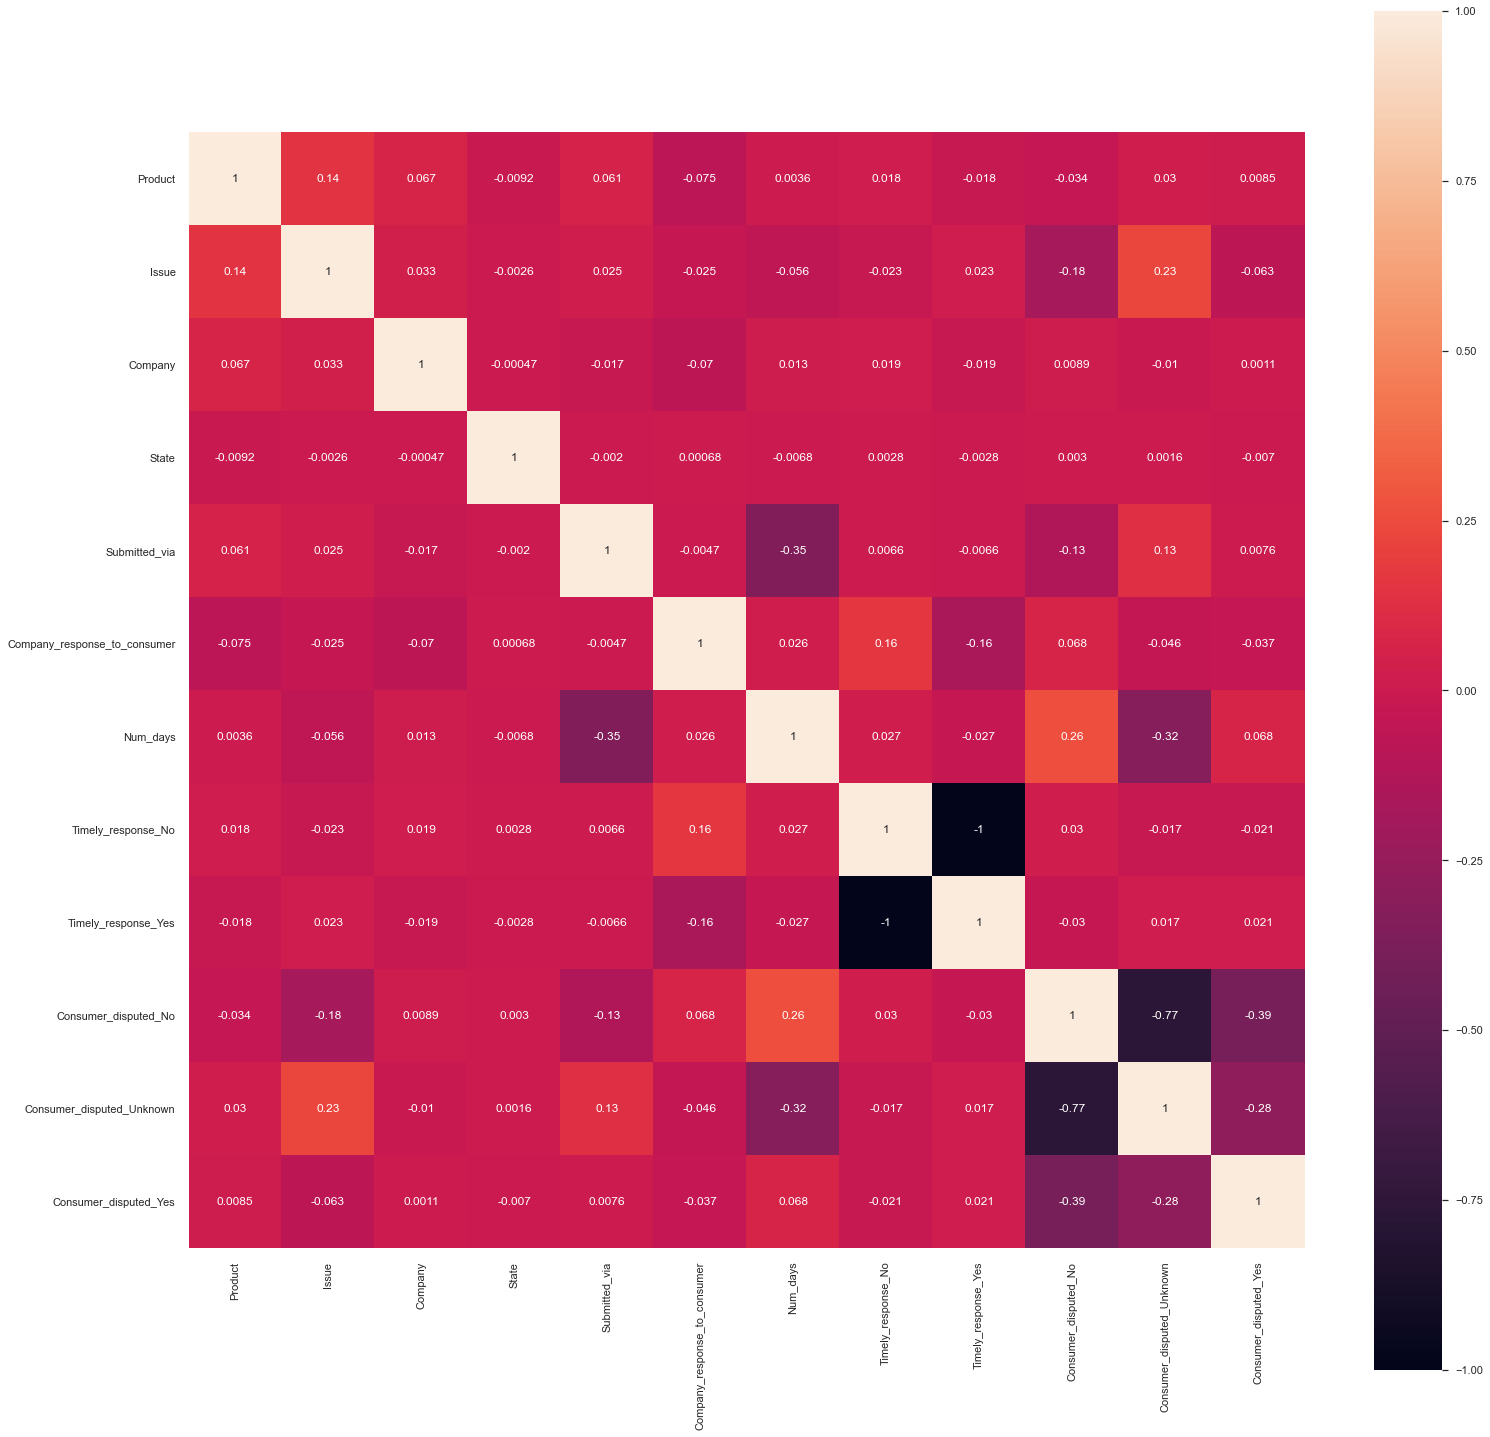

In [73]:
plt.figure(figsize = (25,25))
sns.heatmap(reg.corr(), square = True, linecolor = 'red', annot = True)
reg.shape

In [74]:
%matplotlib inline
from sklearn.model_selection import train_test_split

# split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



print("Size of training set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

Size of training set: 885763   size of test set: 295255



In [75]:
X_train.shape
y_train.shape

(885763, 13)

(885763,)

In [76]:
# # basic without gridsearch
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# # Instantiate model with 1000 decision trees
# rf = RandomForestClassifier(n_estimators = 1000)

# # Train the model on training data
# rf.fit(X_train, y_train)

In [77]:
# # Use the forest's predict method on the test data
# predictions = rf.predict(X_test)
# # Calculate the absolute errors
# errors = abs(predictions - X_test)
# # Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



estimator = [20,50,70]
max_features_val= [2,3,5,]

param_grid = dict(n_estimators=estimator, max_features=max_features_val)
print(param_grid)

{'n_estimators': [20, 50, 70], 'max_features': [2, 3, 5]}


In [79]:
rf_r = RandomForestClassifier()

rfgs = GridSearchCV(rf_r, param_grid = param_grid, cv=10, scoring='r2')
rfgs.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 5],
                         'n_estimators': [20, 50, 70]},
             scoring='r2')

In [80]:
rfgs.best_score_

0.5334482776440297

In [81]:
rfgs.best_params_

{'max_features': 5, 'n_estimators': 70}

In [92]:
rf_r_best = RandomForestRegressor(n_estimators= 70,max_features= 5 )

In [93]:
rf_r_best.fit(X_train,y_train)

RandomForestRegressor(max_features=5, n_estimators=70)

In [94]:
# prediction on test set
y_pred=rf_r_best.predict(X_test)
y_pred.shape
y_test.shape

(295255,)

(295255,)

In [95]:
pd.crosstab(y_test, y_pred)

col_0,1.000000,1.142857,1.157143,1.214286,1.228571,1.242857,1.271429,1.285714,1.300000,1.314286,...,4.628571,4.685714,4.757143,4.771429,4.800000,4.814286,4.900000,4.914286,4.942857,4.985714
Num_days,,,,,,,,,,,,,,,,,,,,,
1.0,2,1,1,2,1,1,4,3,1,2,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,3
6.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [96]:
features = rf_r_best.feature_importances_
features

array([0.26439318, 0.0303586 , 0.03806895, 0.08326395, 0.07617901,
       0.21674721, 0.24014369, 0.01417667, 0.00134374, 0.00128502,
       0.01073018, 0.01910506, 0.00420476])

In [97]:
cols = X_train.columns
cols

Index(['Date_received', 'Product', 'Issue', 'Company', 'State',
       'Submitted_via', 'Date_sent_to_company', 'Company_response_to_consumer',
       'Timely_response_No', 'Timely_response_Yes', 'Consumer_disputed_No',
       'Consumer_disputed_Unknown', 'Consumer_disputed_Yes'],
      dtype='object')

In [98]:
feat_cols = pd.DataFrame(data=[cols,features])

In [99]:
feat_cols



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Date_received,Product,Issue,Company,State,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Timely_response_No,Timely_response_Yes,Consumer_disputed_No,Consumer_disputed_Unknown,Consumer_disputed_Yes
1,0.264393,0.0303586,0.0380689,0.0832639,0.076179,0.216747,0.240144,0.0141767,0.00134374,0.00128502,0.0107302,0.0191051,0.00420476


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 13 artists>

([<matplotlib.axis.YTick at 0x1295dc5c0>,
 [Text(0, 0, 'Timely_response_Yes'),
  Text(0, 1, 'Timely_response_No'),
  Text(0, 2, 'Consumer_disputed_Yes'),
  Text(0, 3, 'Consumer_disputed_No'),
  Text(0, 4, 'Company_response_to_consumer'),
  Text(0, 5, 'Consumer_disputed_Unknown'),
  Text(0, 6, 'Product'),
  Text(0, 7, 'Issue'),
  Text(0, 8, 'State'),
  Text(0, 9, 'Company'),
  Text(0, 10, 'Submitted_via'),
  Text(0, 11, 'Date_sent_to_company'),
  Text(0, 12, 'Date_received')])

Text(0.5, 0, 'Relative Importance')

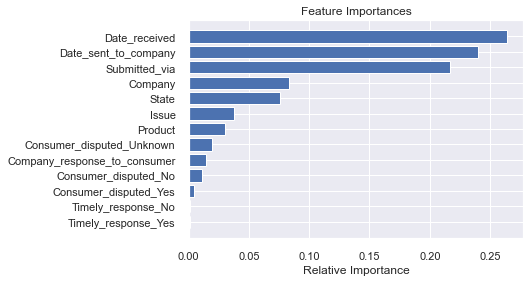

In [100]:
features=cols
importances = rf_r_best.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [101]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Accuracy')

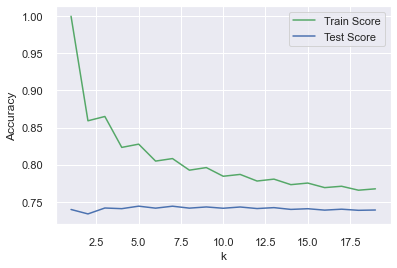

In [103]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()



In [ ]:
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#param_grid = dict(k_range' : [1,3,5,7,9,12,15,17,20])
k_range = [1,3,5,7,9,12,15,17,20]          
weights_range = ['uniform','distance'] 
param_grid = dict(n_neighbors=k_range, weights = weights_range)


#grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search = GridSearchCV(knn, param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:


# Using the best params 

from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []


knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
train_score_array.append(knn.score(X_train, y_train))
test_score_array.append(knn.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn_c_bst_clf = KNeighborsClassifier(n_neighbors=1)

knn_c_bst_clf.fit(X_train,y_train)

knnc_tr_pred = knn_c_bst_clf.predict(X_train)
knnc_test_pred = knn_c_bst_clf.predict(X_test)

In [ ]:
pd.crosstab(y_test, knnc_test_pred)

In [ ]:
print(classification_report(y_test, knnc_test_pred))

In [ ]:
print("Accuracy score: ", accuracy_score(y_test, knnc_test_pred))